In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("risk_profile_dataset.xlsx")
df = pd.DataFrame(data)

df.head()

,age,income,experience,risk_tolerance,investment_horizon,risk_profile
0,25,80,3,2,3,Moderat
1,35,120,2,3,4,Agresif
2,45,60,4,1,2,Konservatif
3,20,70,1,2,3,Moderat
4,55,150,3,3,4,Moderat


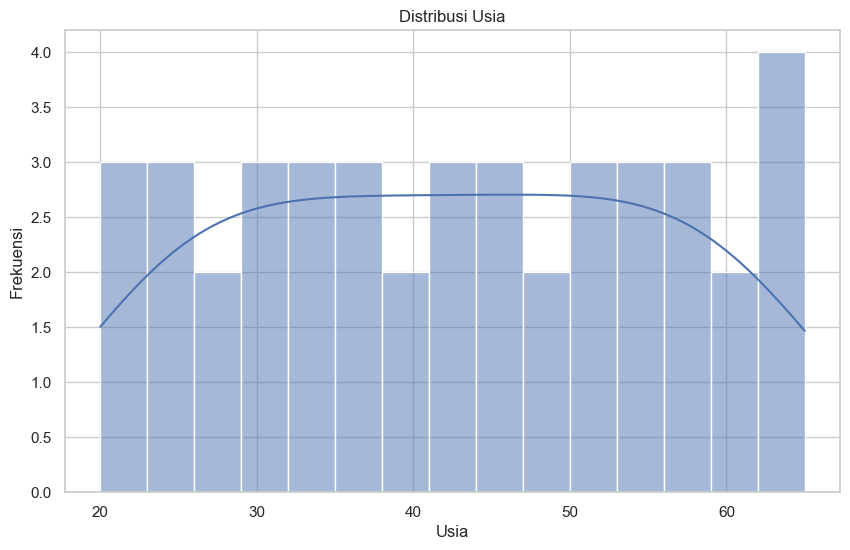

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=15)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

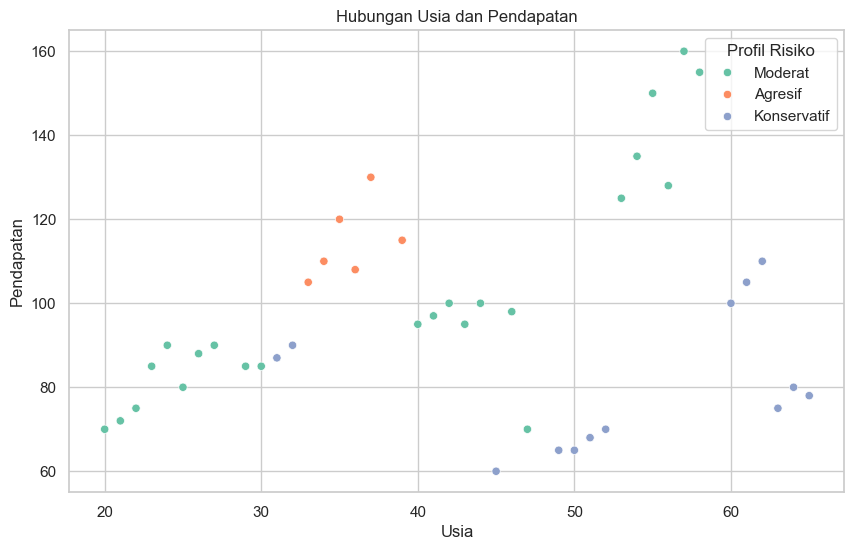

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='risk_profile', data=df, palette='Set2')
plt.title('Hubungan Usia dan Pendapatan')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.legend(title='Profil Risiko')
plt.show()

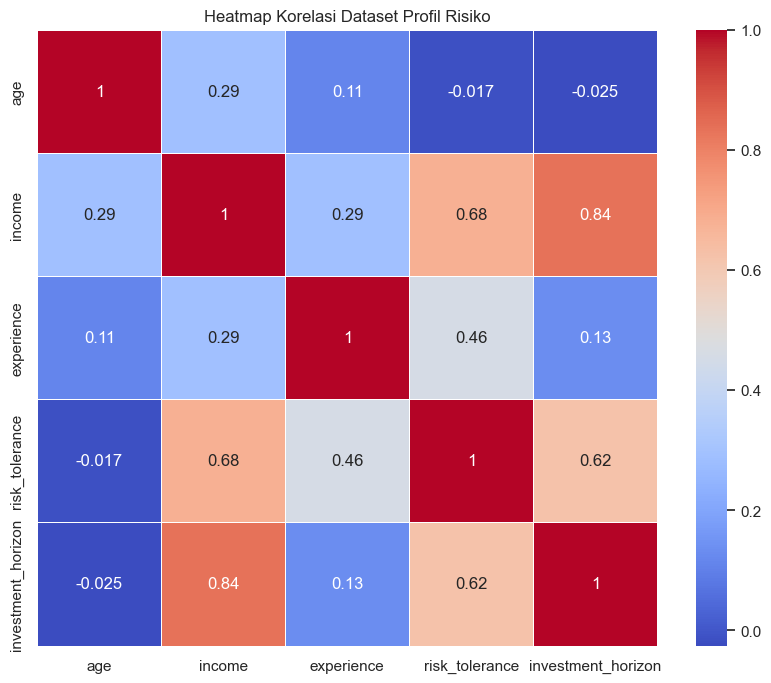

In [12]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Dataset Profil Risiko')
plt.show()

In [13]:
X = df.drop('risk_profile', axis=1)
y = df['risk_profile']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 0.89


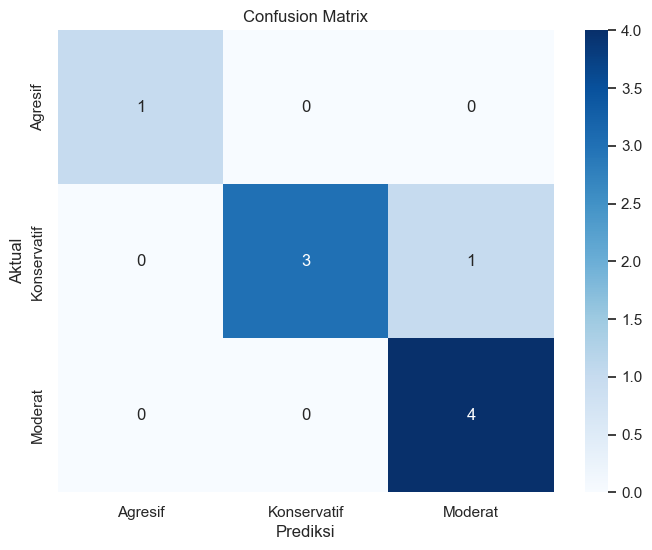

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Testing

In [19]:
def get_user_input():
    age = int(input("Berapa umur Anda? "))
    income = int(input("Berapa jumlah pendapatan tahunan Anda (dalam juta)? "))
    experience = int(input("Seberapa besar pengalaman Anda dalam berinvestasi? (1: Tidak ada, 2: Sedikit, 3: Sedang, 4: Banyak) "))
    risk_tolerance = int(input("Seberapa besar toleransi Anda terhadap risiko? (1: Rendah, 2: Sedang, 3: Tinggi) "))
    investment_horizon = int(input("Berapa lama Anda berencana untuk menyimpan investasi Anda? (1: < 1 tahun, 2: 1-3 tahun, 3: 3-5 tahun, 4: > 5 tahun) "))
    
    return np.array([[age, income, experience, risk_tolerance, investment_horizon]])

def get_investment_suggestion(profile):
    np.random.seed()
    if profile == 'Konservatif':
        reksa_dana = np.random.uniform(50, 70)
        obligasi = np.random.uniform(15, 25)
        saham = np.random.uniform(5, 15)
        emas = 100 - (reksa_dana + obligasi + saham)
    elif profile == 'Moderat':
        reksa_dana = np.random.uniform(20, 40)
        saham = np.random.uniform(30, 50)
        obligasi = np.random.uniform(15, 25)
        emas = 100 - (reksa_dana + saham + obligasi)
    elif profile == 'Agresif':
        reksa_dana = np.random.uniform(15, 25)
        saham = np.random.uniform(40, 60)
        crypto = np.random.uniform(15, 25)
        emas = 100 - (reksa_dana + saham + crypto)
        obligasi = 0  # Adjust so total sum is 100
    else:
        return "Profil tidak dikenali"
    
    if profile == 'Agresif':
        return f"{reksa_dana:.2f}% Reksa Dana, {saham:.2f}% Saham, {crypto:.2f}% Crypto, {emas:.2f}% Emas"
    else:
        return f"{reksa_dana:.2f}% Reksa Dana, {saham:.2f}% Saham, {obligasi:.2f}% Obligasi, {emas:.2f}% Emas"

user_input = get_user_input()
user_pred = knn.predict(user_input)
user_profile = le.inverse_transform(user_pred)

print(f"Profil risiko Anda adalah: {user_profile[0]}")
print(f"Rekomendasi investasi: {get_investment_suggestion(user_profile[0])}")

Berapa umur Anda?  20
Berapa jumlah pendapatan tahunan Anda (dalam juta)?  120
Seberapa besar pengalaman Anda dalam berinvestasi? (1: Tidak ada, 2: Sedikit, 3: Sedang, 4: Banyak)  4
Seberapa besar toleransi Anda terhadap risiko? (1: Rendah, 2: Sedang, 3: Tinggi)  3
Berapa lama Anda berencana untuk menyimpan investasi Anda? (1: < 1 tahun, 2: 1-3 tahun, 3: 3-5 tahun, 4: > 5 tahun)  2


Profil risiko Anda adalah: Agresif
Rekomendasi investasi: 23.04% Reksa Dana, 47.21% Saham, 17.12% Crypto, 12.63% Emas


C:\Users\azizl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
